Rainfall Anomaly Index (RAI)
---


<img src="RAI.png">


Where:
---

### N = current monthly/yearly rainfall, in order words, of the month/year when RAI will be generated (mm); 

### $\overline{N}$ = monthly/yearly average rainfall of the historical series (mm); 
    
### $\overline{M}$ = average of the ten highest monthly/yearly precipitations of the historical series (mm); 
    
### $\overline{X}$ = average of the ten lowest monthly/ yearly precipitations of the historical series (mm); and positive anomalies have their values above average and negative anomalies have their values below average.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
dataset = xr.open_mfdataset('chirps-v2.0.*.days_p25.nc', combine='by_coords')
dataset

<xarray.Dataset>
Dimensions:    (latitude: 400, longitude: 1440, time: 14610)
Coordinates:
  * latitude   (latitude) float32 -49.875 -49.625 -49.375 ... 49.625 49.875
  * longitude  (longitude) float32 -179.875 -179.625 ... 179.625 179.875
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2020-12-31
Data variables:
    precip     (time, latitude, longitude) float32 dask.array<chunksize=(365, 400, 1440), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-10-07
    creator_name:      Pete Peterson
    creator_email:     pete@geog.ucsb.edu
    institution:       Climate Hazards Group.  University of California at Sa...
    documentation:     http://pubs.usgs.gov/ds/832/
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [3]:
# After reading my dataset, I selected Ghana's own from the entire dataset 
#and also called the variable, 'precip'

da_Ghana_rainfall = dataset.sel(latitude=slice(4,12), longitude=slice(-3,1.5)).precip
da_Ghana_rainfall

<xarray.DataArray 'precip' (time: 14610, latitude: 32, longitude: 18)>
dask.array<getitem, shape=(14610, 32, 18), dtype=float32, chunksize=(366, 32, 18), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 4.125 4.375 4.625 ... 11.375 11.625 11.875
  * longitude  (longitude) float32 -2.875 -2.625 -2.375 ... 0.875 1.125 1.375
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2020-12-31
Attributes:
    units:               mm/day
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [4]:
# the data is a  daily data so I have to resample it to monthly 
# so for every year I will have twelve months

da_Ghana_monthly_rainfall = da_Ghana_rainfall.resample(time = 'm').sum()
da_Ghana_monthly_rainfall

<xarray.DataArray 'precip' (time: 480, latitude: 32, longitude: 18)>
dask.array<stack, shape=(480, 32, 18), dtype=float32, chunksize=(1, 32, 18), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2020-12-31
  * latitude   (latitude) float32 4.125 4.375 4.625 ... 11.375 11.625 11.875
  * longitude  (longitude) float32 -2.875 -2.625 -2.375 ... 0.875 1.125 1.375

In [5]:
#the RAI can be be performed monthly and yearly 
#so over here I also resampled another data to yearly just in case I want yearly RAI I can Use this file

da_Ghana_yearly_rainfall = da_Ghana_rainfall.resample(time = 'y').sum()
da_Ghana_yearly_rainfall

<xarray.DataArray 'precip' (time: 40, latitude: 32, longitude: 18)>
dask.array<stack, shape=(40, 32, 18), dtype=float32, chunksize=(1, 32, 18), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1981-12-31 1982-12-31 ... 2020-12-31
  * latitude   (latitude) float32 4.125 4.375 4.625 ... 11.375 11.625 11.875
  * longitude  (longitude) float32 -2.875 -2.625 -2.375 ... 0.875 1.125 1.375

Rainfall Anomaly Index (RAI)
---


<img src="RAI.png">


Where:
---

N = current monthly/yearly rainfall, in order words, of the month/year when RAI will be generated (mm); 

$\overline{N}$ = monthly/yearly average rainfall of the historical series (mm); 
    
$\overline{M}$ = average of the ten highest monthly/yearly precipitations of the historical series (mm); 
    
 $\overline{X}$ = average of the ten lowest monthly/ yearly precipitations of the historical series (mm); and positive anomalies have their values above average and negative anomalies have their values below average.

In [6]:
#Rainfall Anomaly Index Function

def RAI(data, dimension):
    overall_mean = data.mean(dimension)     #overall mean in the formula is N_bar
    
   
    anomaly = data - overall_mean    #the anomaly will be given by difference b/n each value of rainfall in 
                                     #the data array and the overll_mean
                                     #the anomaly in the formula the the N-N_bar(numerator)   
    
    
    sortings = data.reduce(np.sort,dim=dimension)  
    
    
    da_lowest_10 = sortings[:10].mean(dimension)    #this will give the mean of 10 lowest yearly/monthly precip
                                                    #the da_lowest in the formula is X_bar
        
        
    da_highest_10 = sortings[:-10:-1].mean(dimension) #this will give the mean of 10 highest yearly/monthly precip
                                                      #the da_lowest in the formula is M_ba
    
    
    negatives = -3*( (anomaly.where(anomaly<0)) / (da_lowest_10-overall_mean) ) #if the anomalies gives negative values
                                                                                #this formula should be used 
    
    
    positives = 3*( (anomaly.where(anomaly>0)) / (da_highest_10-overall_mean) ) #if the anomalies gives positive values,
                                                                                #this formula should be used
    
    
    RAI = anomaly.where(anomaly>=0, negatives).where(anomaly<0, positives)   # after all the calculation, both the 
                                                                                #negatve and positives anomalies index 
                                                                             # will be put together and assigned to RAI
    
    return RAI

Rainfall Anomaly Index (RAI)
---


<img src="RAIT.png">




In [7]:
#the RAI created takes;
#the name of the netcdf file you want to use (da_Ghana_yearly_rainfall)
#the dimension you want to perform the RAI on (time)

da_yearly_RAI = RAI(da_Ghana_yearly_rainfall, 'time')
da_monthly_RAI = RAI(da_Ghana_monthly_rainfall, 'time')

/home/okrah/anaconda3/lib/python3.8/site-packages/dask/array/core.py:1488: FutureWarning: The `numpy.sort` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(
/home/okrah/anaconda3/lib/python3.8/site-packages/dask/array/core.py:1488: FutureWarning: The `numpy.sort` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


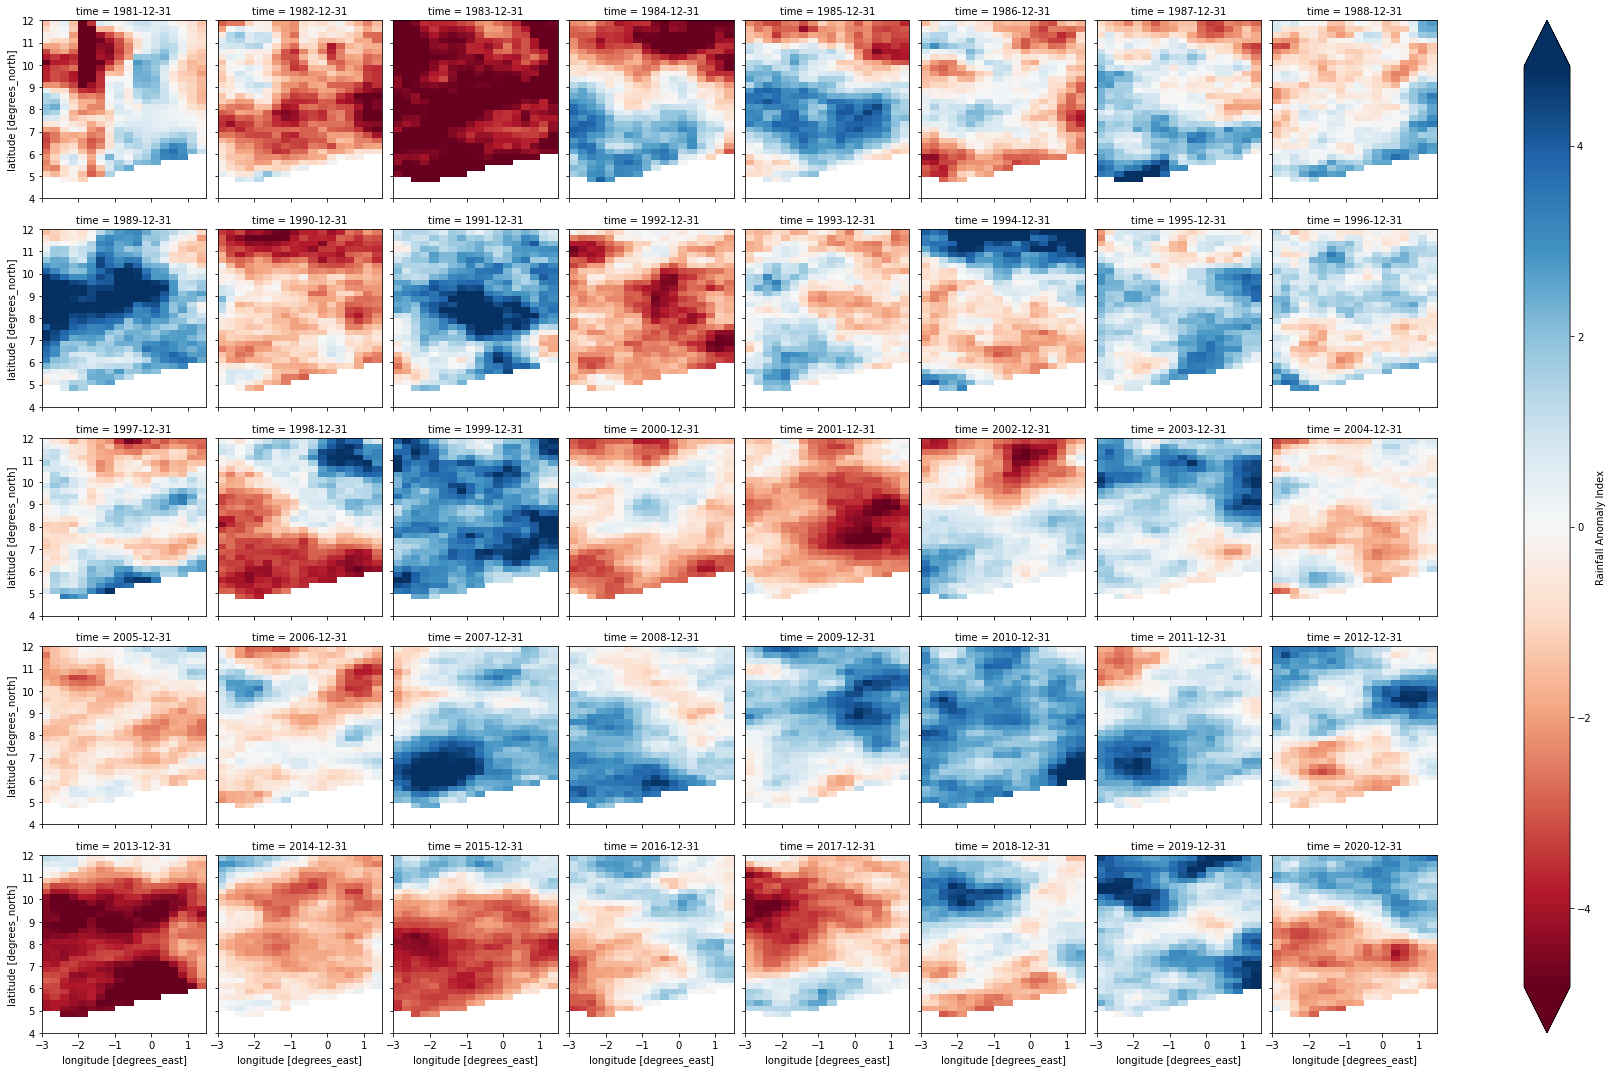

In [9]:
Ghana_Annual_RAI = da_yearly_RAI.plot.pcolormesh(x="longitude", y="latitude", col="time", 
                                                 col_wrap=8, robust = True, cmap='RdBu_r', 
                                                 cbar_kwargs={"label": "Rainfall Anomaly Index"})
plt.savefig("Yearly_RAI_for_Gridded_Data.pdf")
plt.savefig("Yearly_RAI_for_Gridded_Data.png")

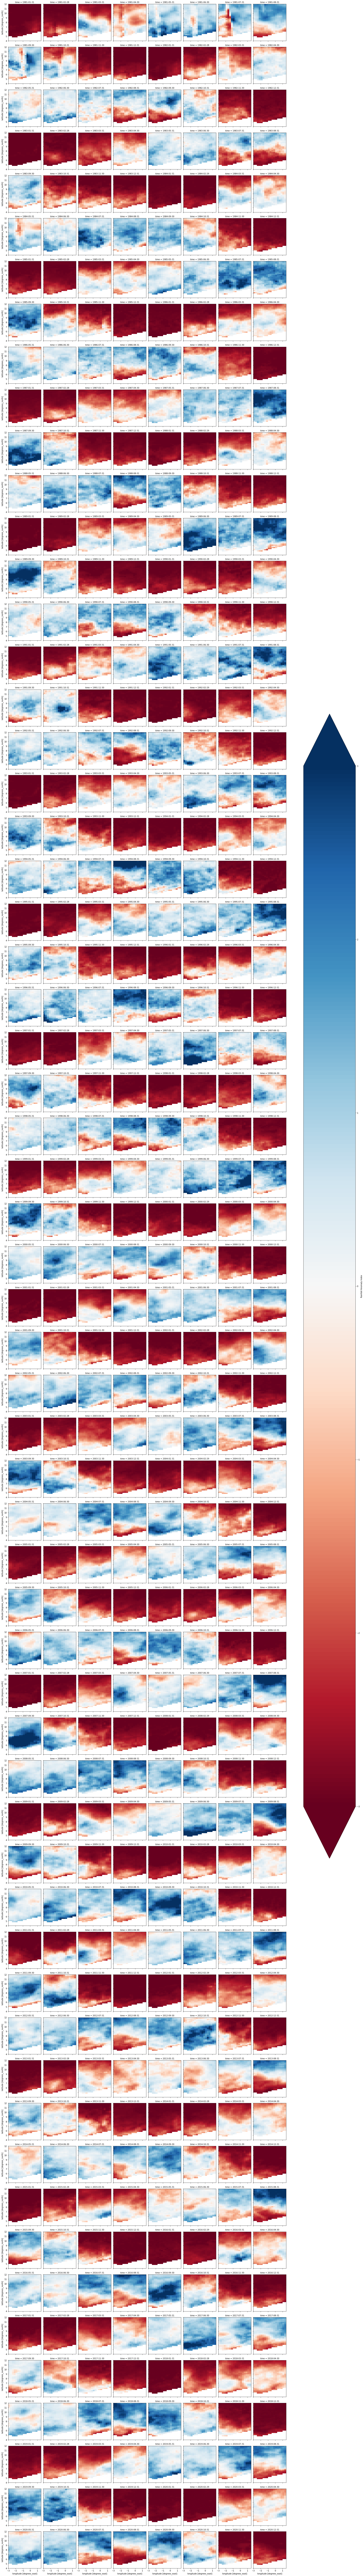

In [10]:
Ghana_monthly_RAI = da_monthly_RAI.plot.pcolormesh(x="longitude", y="latitude", col="time", 
                                                   col_wrap=8, robust = True, cmap='RdBu', 
                                                   cbar_kwargs={"label": "Rainfall Anomaly Index"})
plt.savefig("Monthly_RAI_for_Gridded_Data.pdf")
plt.savefig("Monthly_RAI_for_Gridded_Data.png")

In [25]:
#Annual RAI for ghana for the period of 1981 to 2020 for the 22 stations In Ghana

Navrongo = da_yearly_RAI.sel(longitude = -1.10, latitude = 10.90, method = 'nearest')
Wa       = da_yearly_RAI.sel(longitude = -2.50, latitude = 10.05, method ='nearest')
Tamale   = da_yearly_RAI.sel(longitude = -0.85, latitude = 9.50, method ='nearest')
Yendi    = da_yearly_RAI.sel(longitude = -0.01, latitude = 9.45, method ='nearest')
Bole     = da_yearly_RAI.sel(longitude = -2.48, latitude = 9.03, method ='nearest')
Wenchi   = da_yearly_RAI.sel(longitude = -2.10, latitude = 7.75, method ='nearest') 
Sunyani  = da_yearly_RAI.sel(longitude = -2.33, latitude = 7.33, method ='nearest')
Kumasi   = da_yearly_RAI.sel(longitude = -1.60, latitude = 6.72, method ='nearest') 
Abetifi  = da_yearly_RAI.sel(longitude = -0.75, latitude = 6.67, method ='nearest')
Ho       = da_yearly_RAI.sel(longitude =  0.48, latitude = 6.67, method ='nearest')   
Akatsi   = da_yearly_RAI.sel(longitude =  0.80, latitude = 6.12, method ='nearest')
Akuse    = da_yearly_RAI.sel(longitude =  0.12, latitude = 6.10, method ='nearest')           
Accra    = da_yearly_RAI.sel(longitude = -0.17, latitude = 5.60, method ='nearest')              
Axim     = da_yearly_RAI.sel(longitude = -2.23, latitude = 4.87, method ='nearest')
Tema     = da_yearly_RAI.sel(longitude =  0.00, latitude = 5.62, method ='nearest')
Saltpond = da_yearly_RAI.sel(longitude = -1.07, latitude = 5.20, method ='nearest')           
Takoradi = da_yearly_RAI.sel(longitude = -1.77, latitude = 4.88, method ='nearest')
Koforidua= da_yearly_RAI.sel(longitude = -0.25, latitude = 6.08, method ='nearest')           
Akim_Oda = da_yearly_RAI.sel(longitude = -0.98, latitude = 5.93, method ='nearest')
Sefwi_Bekwai= da_yearly_RAI.sel(longitude = -2.33, latitude = 6.20, method ='nearest')   
Kete_Krachi = da_yearly_RAI.sel(longitude = -0.03, latitude = 7.825, method ='nearest')

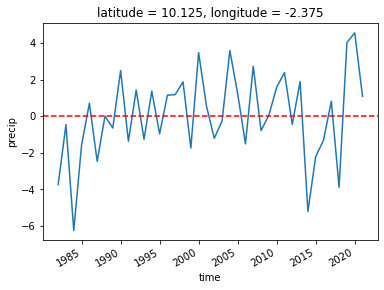

In [26]:
Wa.plot()
plt.axhline(0, color='red', linestyle='dashed')

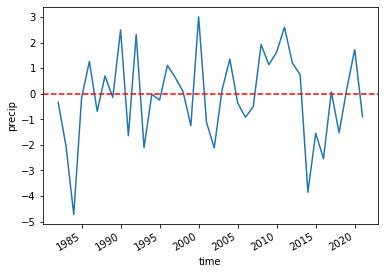

In [10]:
da_monthly_RAI.mean(['longitude','latitude'])
a.plot()
plt.axhline(0, color='red', linestyle='dashed')

In [ ]:
da_monthly_RAI.sel(time=slice(0,39)).plot(cmap='RdBu',col = 'time', col_wrap=4 ,robust = True, cbar_kwargs={"label": "Rainfall Anomaly Index"})

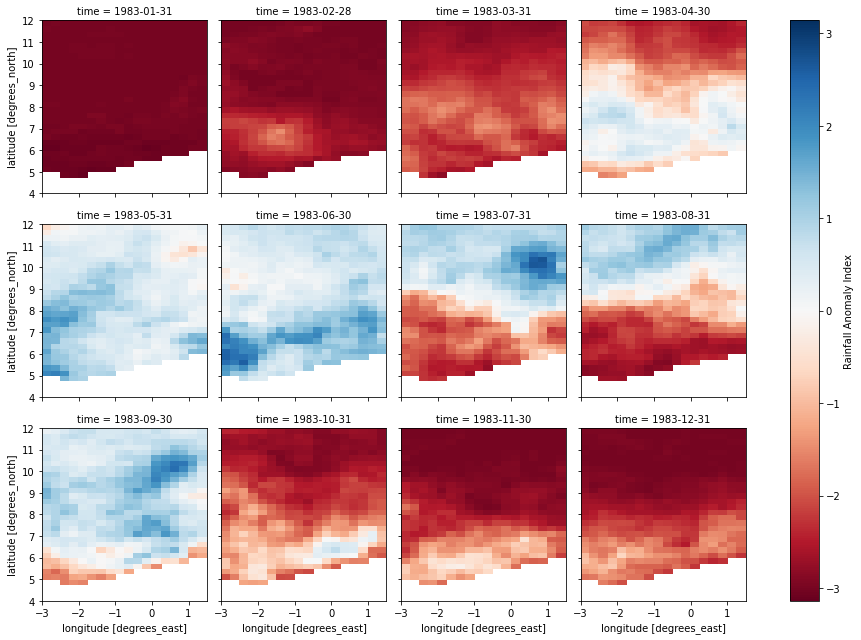

In [130]:
da_monthly_RAI.sel(time='1983').plot(cmap='RdBu',col = 'time', col_wrap=4 ,robust = True, cbar_kwargs={"label": "Rainfall Anomaly Index"})

In [ ]:
Ghana_RAI = da_monthly_RAI.plot.pcolormesh(x="longitude", y="latitude", col="time", col_wrap=8, robust = True, cmap='RdBu', cbar_kwargs={"label": "Rainfall Anomaly Index"})

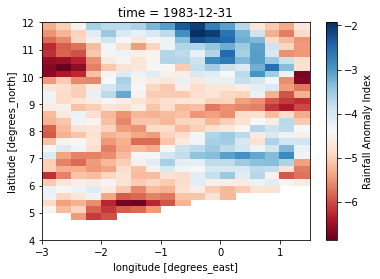

In [90]:
da_yearly_RAI.sel(time='1983').plot(cmap='RdBu', cbar_kwargs={"label": "Rainfall Anomaly Index"})

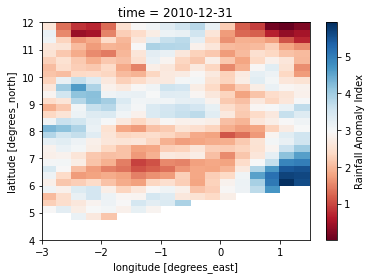

In [91]:
da_yearly_RAI.sel(time='2010').plot(cmap='RdBu', cbar_kwargs={"label": "Rainfall Anomaly Index"})

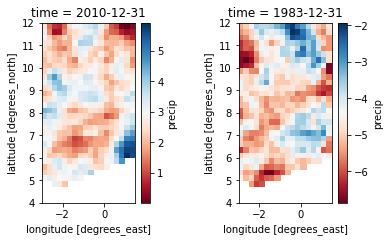

In [109]:
RAI_1983 = da_yearly_RAI.sel(time='1983')
RAI_2010 = da_yearly_RAI.sel(time='2010')
fig, axes = plt.subplots(ncols = 2)
axes = axes.flatten()
RAI_2010.plot(ax=axes[0], cmap='RdBu')
RAI_1983.plot(ax=axes[1], cmap = 'RdBu')
plt.tight_layout(pad=3.0)
plt.draw()

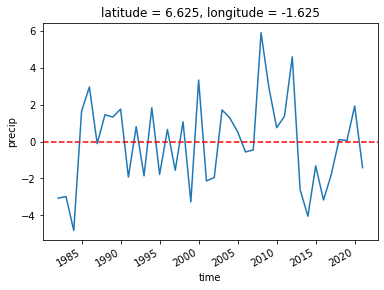

In [74]:
#checking the timeseries of KNUST
da_yearly_RAI.sel(longitude=-1.57, latitude=6.68, method='nearest').plot()
plt.axhline(0, color='red', linestyle='dashed')

In [ ]:
g_simple = da_RAI.plot.pcolormesh(x="longitude", y="latitude", col="time", col_wrap=8, robust = True, cmap='RdBu', cbar_kwargs={"label": "Rainfall Anomaly Index"})